In [1050]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1051]:
# read data from file
file_path = './data/iris.csv'
data = pd.read_csv(file_path, header=0)

# data preprocessing
iris_class = {'Iris-setosa': 0, 'Iris-virginica': 1}
data['class'] = data['class'].map(iris_class) 

# shuffle data
data = data.sample(frac=1)


# split data into x_train and y_train
x_train = data.iloc[:, :-1].values
y_train = data.iloc[:, -1].values



In [1052]:
# split data to train and test
test_size = 0.2
test_count = int(len(x_train) * test_size)

# split data
x_test = x_train[:test_count]
y_test = y_train[:test_count]
x_train = x_train[test_count:]
y_train = y_train[test_count:]



In [1053]:
# normalize data
# subtract the mean and divide by the standard deviation
original_x = x_train
def normalize(x):
    x = np.copy(x)
    for i in range(x.shape[1]):
        x[:, i] = (x[:, i] - np.mean(x[:, i])) / np.std(x[:, i])
    return x
x_train = normalize(x_train)
x_test = normalize(x_test)
print(x_train[0:3])

[[-0.76885465  0.71816385 -1.04212761 -0.9406892 ]
 [ 0.76611364  0.          0.76284473  0.90008391]
 [ 1.42395719 -0.4787759   1.15310902  1.00836468]]


In [1054]:
# initialize parameters
theta = np.random.randn(x_train.shape[1] + 1)
alpha = 0.1
lambda_ = 0.1
max_iter = 1000
# add a column of 1 to x
x_train = np.column_stack((np.ones(x_train.shape[0]), x_train))
x_test = np.column_stack((np.ones(x_test.shape[0]), x_test))

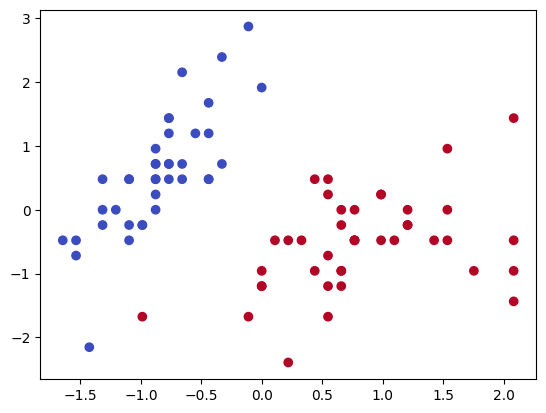

In [1055]:
# plot sample of features (as an example)
features = [1,2]
plt.scatter(x_train[:, features[0]], x_train[:, features[1]], c=y_train, cmap='coolwarm')
plt.show()


In [1057]:
def hypothesis(x, theta, epsilon=1e-12):
    z = np.dot(x, theta)
    h = 1 / (1 + np.exp(-z))
    h = np.clip(h, epsilon, 1 - epsilon) # add epsilon to prevent h from being exactly zero or one
    return h

In [1058]:
def compute_cost(h):
    return -1/len(y_train) * np.sum(y_train * np.log(h) + (1 - y_train) * np.log(1 - h))


In [1059]:
def gradient_descent(x, y, theta, alpha, iterations,lambda_, plot=False):
    m = len(y)
    cost_history = np.zeros(iterations//100)
    theta_history = np.zeros((iterations//100, x_train.shape[1]))
    for i in range(iterations):
        h = hypothesis(x, theta)
        j = (1/m) * np.dot(x.T, (h - y))
        # regularization
        j[1:] = j[1:] + (lambda_ / m) * theta[1:]
        theta = theta - alpha * j
        if(i % 100 == 0):
            theta_history[i//100, :] = theta.T
            cost_history[i//100] = compute_cost(h)
    if plot:
        plt.plot(cost_history, label='cost')
        plt.show()            
    return theta, cost_history, theta_history

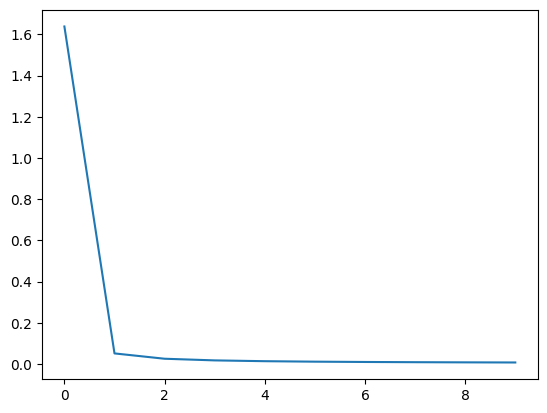

[1.63858605 0.05081737 0.02493337 0.01690871 0.01301997 0.01073244
 0.00923045 0.00817167 0.00738737 0.00678476]


In [1060]:
a=gradient_descent(x_train, y_train, theta, alpha, max_iter, lambda_, True)
# get minimum cost
print(a[1])


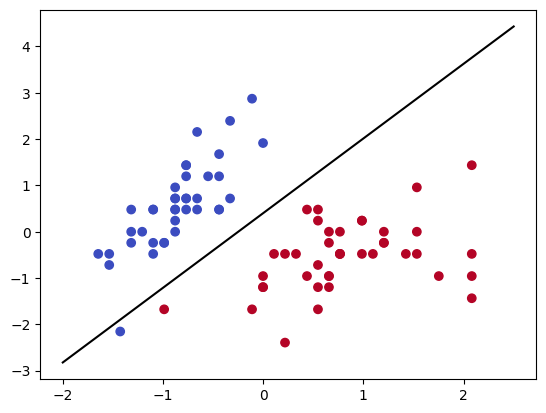

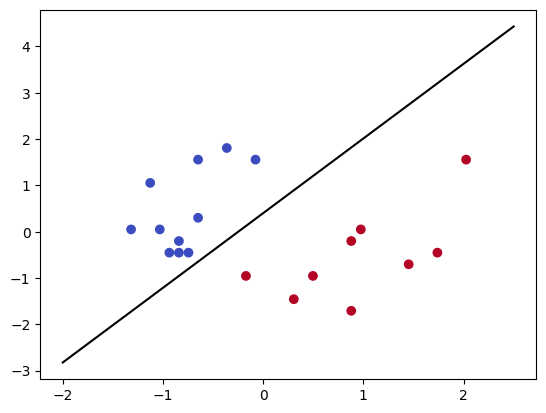

In [1061]:
# draw decision boundary
def plot_decision_boundary(x, y, theta):
    plt.scatter(x[:, features[0]], x[:, features[1]], c=y, cmap='coolwarm')
    x1 = np.linspace(-2, 2.5, 100)
    x2 = -(theta[0] + theta[1] * x1) / theta[2]
    plt.plot(x1, x2, 'k')
    plt.show()  

plot_decision_boundary(x_train, y_train, a[0])
plot_decision_boundary(x_test, y_test, a[0])


In [1062]:
# calculate accuracy on test set
def predict(x, theta):
    h = hypothesis(x, theta)
    return (h >= 0.5).astype(int)

def accuracy(x, y, theta):
    y_pred = predict(x, theta)
    return np.mean(y_pred == y)

print(accuracy(x_test, y_test, a[0]))

1.0


In [1063]:
# compute accuracy on train set

accuracy(x_train, y_train, a[0])


1.0